In [1]:
# https://iq.opengenus.org/polynomial-regression-using-scikit-learn/

In [2]:
import os
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [3]:
cwd = os.getcwd()
output_dir = os.path.join(cwd, "../../data")
df = pd.read_csv(os.path.join(output_dir, "combined_nodeinfo.csv"))
df_test = pd.read_csv(os.path.join(output_dir, "combined_nodeinfotest.csv"))
#df_test = pd.read_csv(os.path.join(output_dir, "figlet1599056546.006096_1599063766.431225.csv"))
df = df.drop(df[df.responsetime > 2].index)
df.pop('Time')
df_test = df_test.drop(df_test[df_test.responsetime > 2].index)
df_test.pop('Time')
df.head()

,cpu,diskio,diskioRead,diskioWritten,mem,networkReceived,networkTransmitted,replica,requests,responsetime,totalcpu,totalcpuUtilization,totalmemory,totalmemoryUtilization
0,0.543895,0.008625,924.236712,63156.175327,0.176144,2128.447148,10523.371640,1.0,50.0,0.103940,6.0,44.260521,1.240458e+10,36.548910
1,0.555150,0.011289,12651.807738,94205.906535,0.176144,6182.507055,20512.544166,1.0,192.0,0.108720,6.0,44.260521,1.240458e+10,37.249118
2,0.521781,0.010222,12652.088889,107315.200000,0.196314,7243.755556,20228.244444,1.0,333.0,0.105527,6.0,15.116667,1.240458e+10,37.249118
3,0.521781,0.009778,11832.888889,115234.133333,0.196314,8994.822222,25560.088889,1.0,474.0,0.108370,6.0,15.116667,1.240458e+10,37.201915
4,0.406110,0.008533,0.000000,97939.911111,0.196123,7063.244444,18804.822222,1.0,564.0,0.103987,6.0,10.733333,1.240458e+10,37.201915


In [7]:
# remove 2xlarge
df = df.drop(df[df.totalcpu > 16].index)

In [8]:
df_t = pd.DataFrame()
df_ttest = pd.DataFrame()

In [9]:
df_t['total_cpu_util'] = (df['totalcpuUtilization']*df['totalcpu'])/100
df_t['total_mem_util'] = (df['totalmemoryUtilization']*df['totalmemory'])*1e-9
df_t['responsetime'] = df['responsetime']
df_t['requests'] = df['requests']
df_t['replica'] = df['replica']
df_ttest['total_cpu_util'] = (df_test['totalcpuUtilization']*df_test['totalcpu'])/100
df_ttest['total_mem_util'] = (df_test['totalmemoryUtilization']*df_test['totalmemory'])*1e-9
df_ttest['responsetime'] = df_test['responsetime']
df_ttest['requests'] = df_test['requests']
df_ttest['replica'] = df_test['replica']
df_t.head()

,total_cpu_util,total_mem_util,responsetime,requests,replica
0,2.655631,453.373747,0.103940,50.0,1.0
1,2.655631,462.059520,0.108720,192.0,1.0
2,0.907000,462.059520,0.105527,333.0,1.0
3,0.907000,461.473997,0.108370,474.0,1.0
4,0.644000,461.473997,0.103987,564.0,1.0


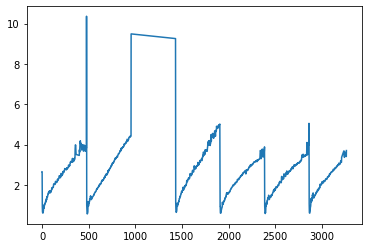

In [10]:
plt.plot(df_t['total_cpu_util'])

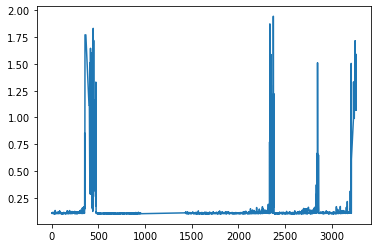

In [11]:
plt.plot(df_t['responsetime'])

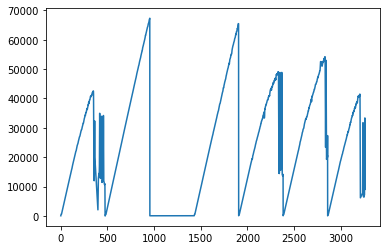

In [12]:
plt.plot(df_t['requests'])

In [15]:
X_train = df_t[[col for col in df_t.columns if col != 'requests']]
y_train = df_t['requests']
X_train = preprocessing.normalize(X_train, norm='l2')
X_test = df_ttest[[col for col in df_ttest.columns if col != 'requests']]
y_test = df_ttest['requests']
X_test = preprocessing.normalize(X_test, norm='l2')

In [16]:
from sklearn.model_selection import cross_val_score
# function to get cross validation scores
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=7,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

# fitting the linear regression model to the dataset

In [17]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)
get_cv_scores(lin_reg)

CV Mean:  0.47927936955309475
STD:  0.15561674115865007




# fitting the polynomial regression model to the dataset

In [18]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2) # plot from 2 to 5 
X_poly=poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly,y_train)
lin_reg2=LinearRegression()
lin_reg2.fit(X_poly,y_train)
get_cv_scores(lin_reg2)

CV Mean:  0.47927936955309475
STD:  0.15561674115865007




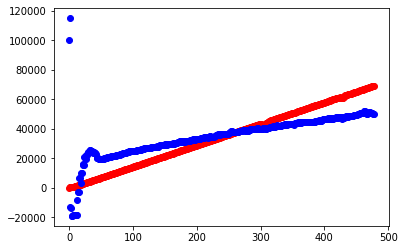

R² : 0.6234209640995193


In [19]:
#plt.scatter(X,y,color='red')
y_perd= lin_reg.predict(X_test)
plt.scatter(range(0,len(y_test)),y_test,color='red')
plt.scatter(range(0,len(y_perd)),y_perd,color='blue')
plt.show()
from sklearn.metrics import r2_score, f1_score
R = r2_score(y_test, y_perd)
print ('R² :',R)

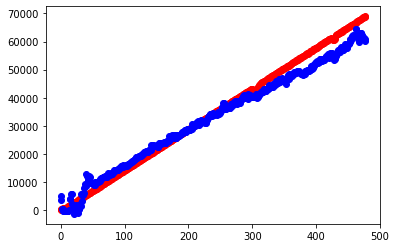

R² : 0.9703453413469364


In [20]:
# plt.scatter(X,y,color='red')
y_perd= lin_reg2.predict(poly_reg.fit_transform(X_test))
plt.scatter(range(0,len(y_test)),y_test,color='red')
plt.scatter(range(0,len(y_perd)),y_perd,color='blue')
plt.show()
from sklearn.metrics import r2_score
R = r2_score(y_test, y_perd)
print ('R² :',R)

# sklearn.neural_network.MLPRegressor

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 500, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 1, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/home/ubuntu/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


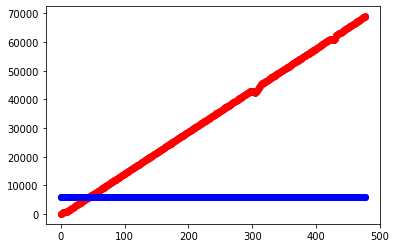

-1.9886544961554438
R² : -1.9886544961554438


In [21]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)

#y_perd = regr.predict(X_eval)
#plt.scatter(range(0,len(y_perd)),y_perd,color='blue')
#plt.scatter(range(0,len(y_test)),y_test,color='red')
#plt.show()
#print(regr.score(X_eval, y_eval))

print(regr.get_params(deep=True))

y_perd = regr.predict(X_test)
plt.scatter(range(0,len(y_test)),y_test,color='red')
plt.scatter(range(0,len(y_perd)),y_perd,color='blue')
plt.show()
print(regr.score(X_test, y_test))
from sklearn.metrics import r2_score
R = r2_score(y_test, y_perd)
print ('R² :',R)

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 50, 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 10, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/home/ubuntu/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


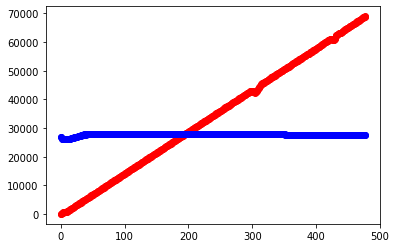

-0.09770396979778795
R² : -0.09770396979778795


In [22]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(random_state=10, max_iter=1000, batch_size=50).fit(X_train, y_train)

#y_perd = regr.predict(X_eval)
#plt.scatter(range(0,len(y_perd)),y_perd,color='blue')
#plt.scatter(range(0,len(y_test)),y_test,color='red')
#plt.show()
#print(regr.score(X_eval, y_eval))

print(regr.get_params(deep=True))

y_perd = regr.predict(X_test)
plt.scatter(range(0,len(y_test)),y_test,color='red')
plt.scatter(range(0,len(y_perd)),y_perd,color='blue')
plt.show()
print(regr.score(X_test, y_test))
from sklearn.metrics import r2_score
R = r2_score(y_test, y_perd)
print ('R² :',R)